In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap


/usr/lib/python3/dist-packages/matplotlib/__init__.py:880: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
adult = pd.read_csv('/home/raghav/Desktop/introduction to machine learning/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
X = adult.iloc[:,[0,1,2,4,5,6,7,8,9,12,13]]
y = adult.iloc[:,14]

/usr/lib/python3/dist-packages/matplotlib/__init__.py:900: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


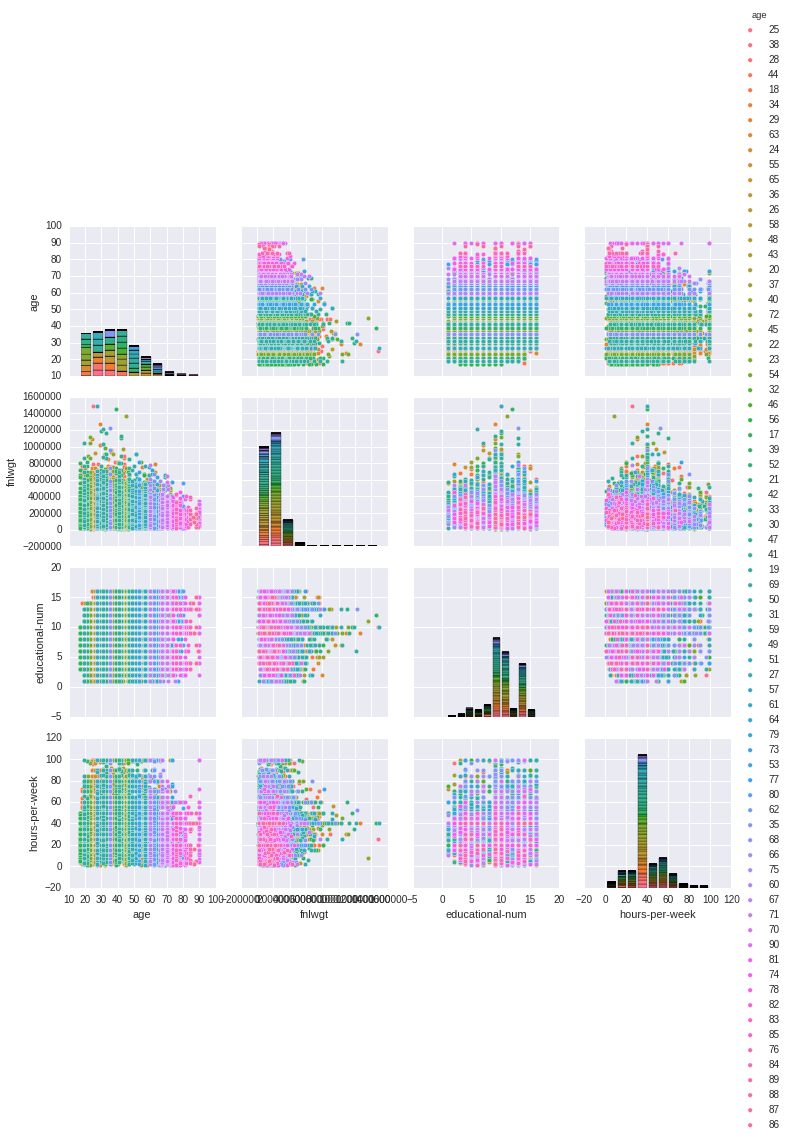

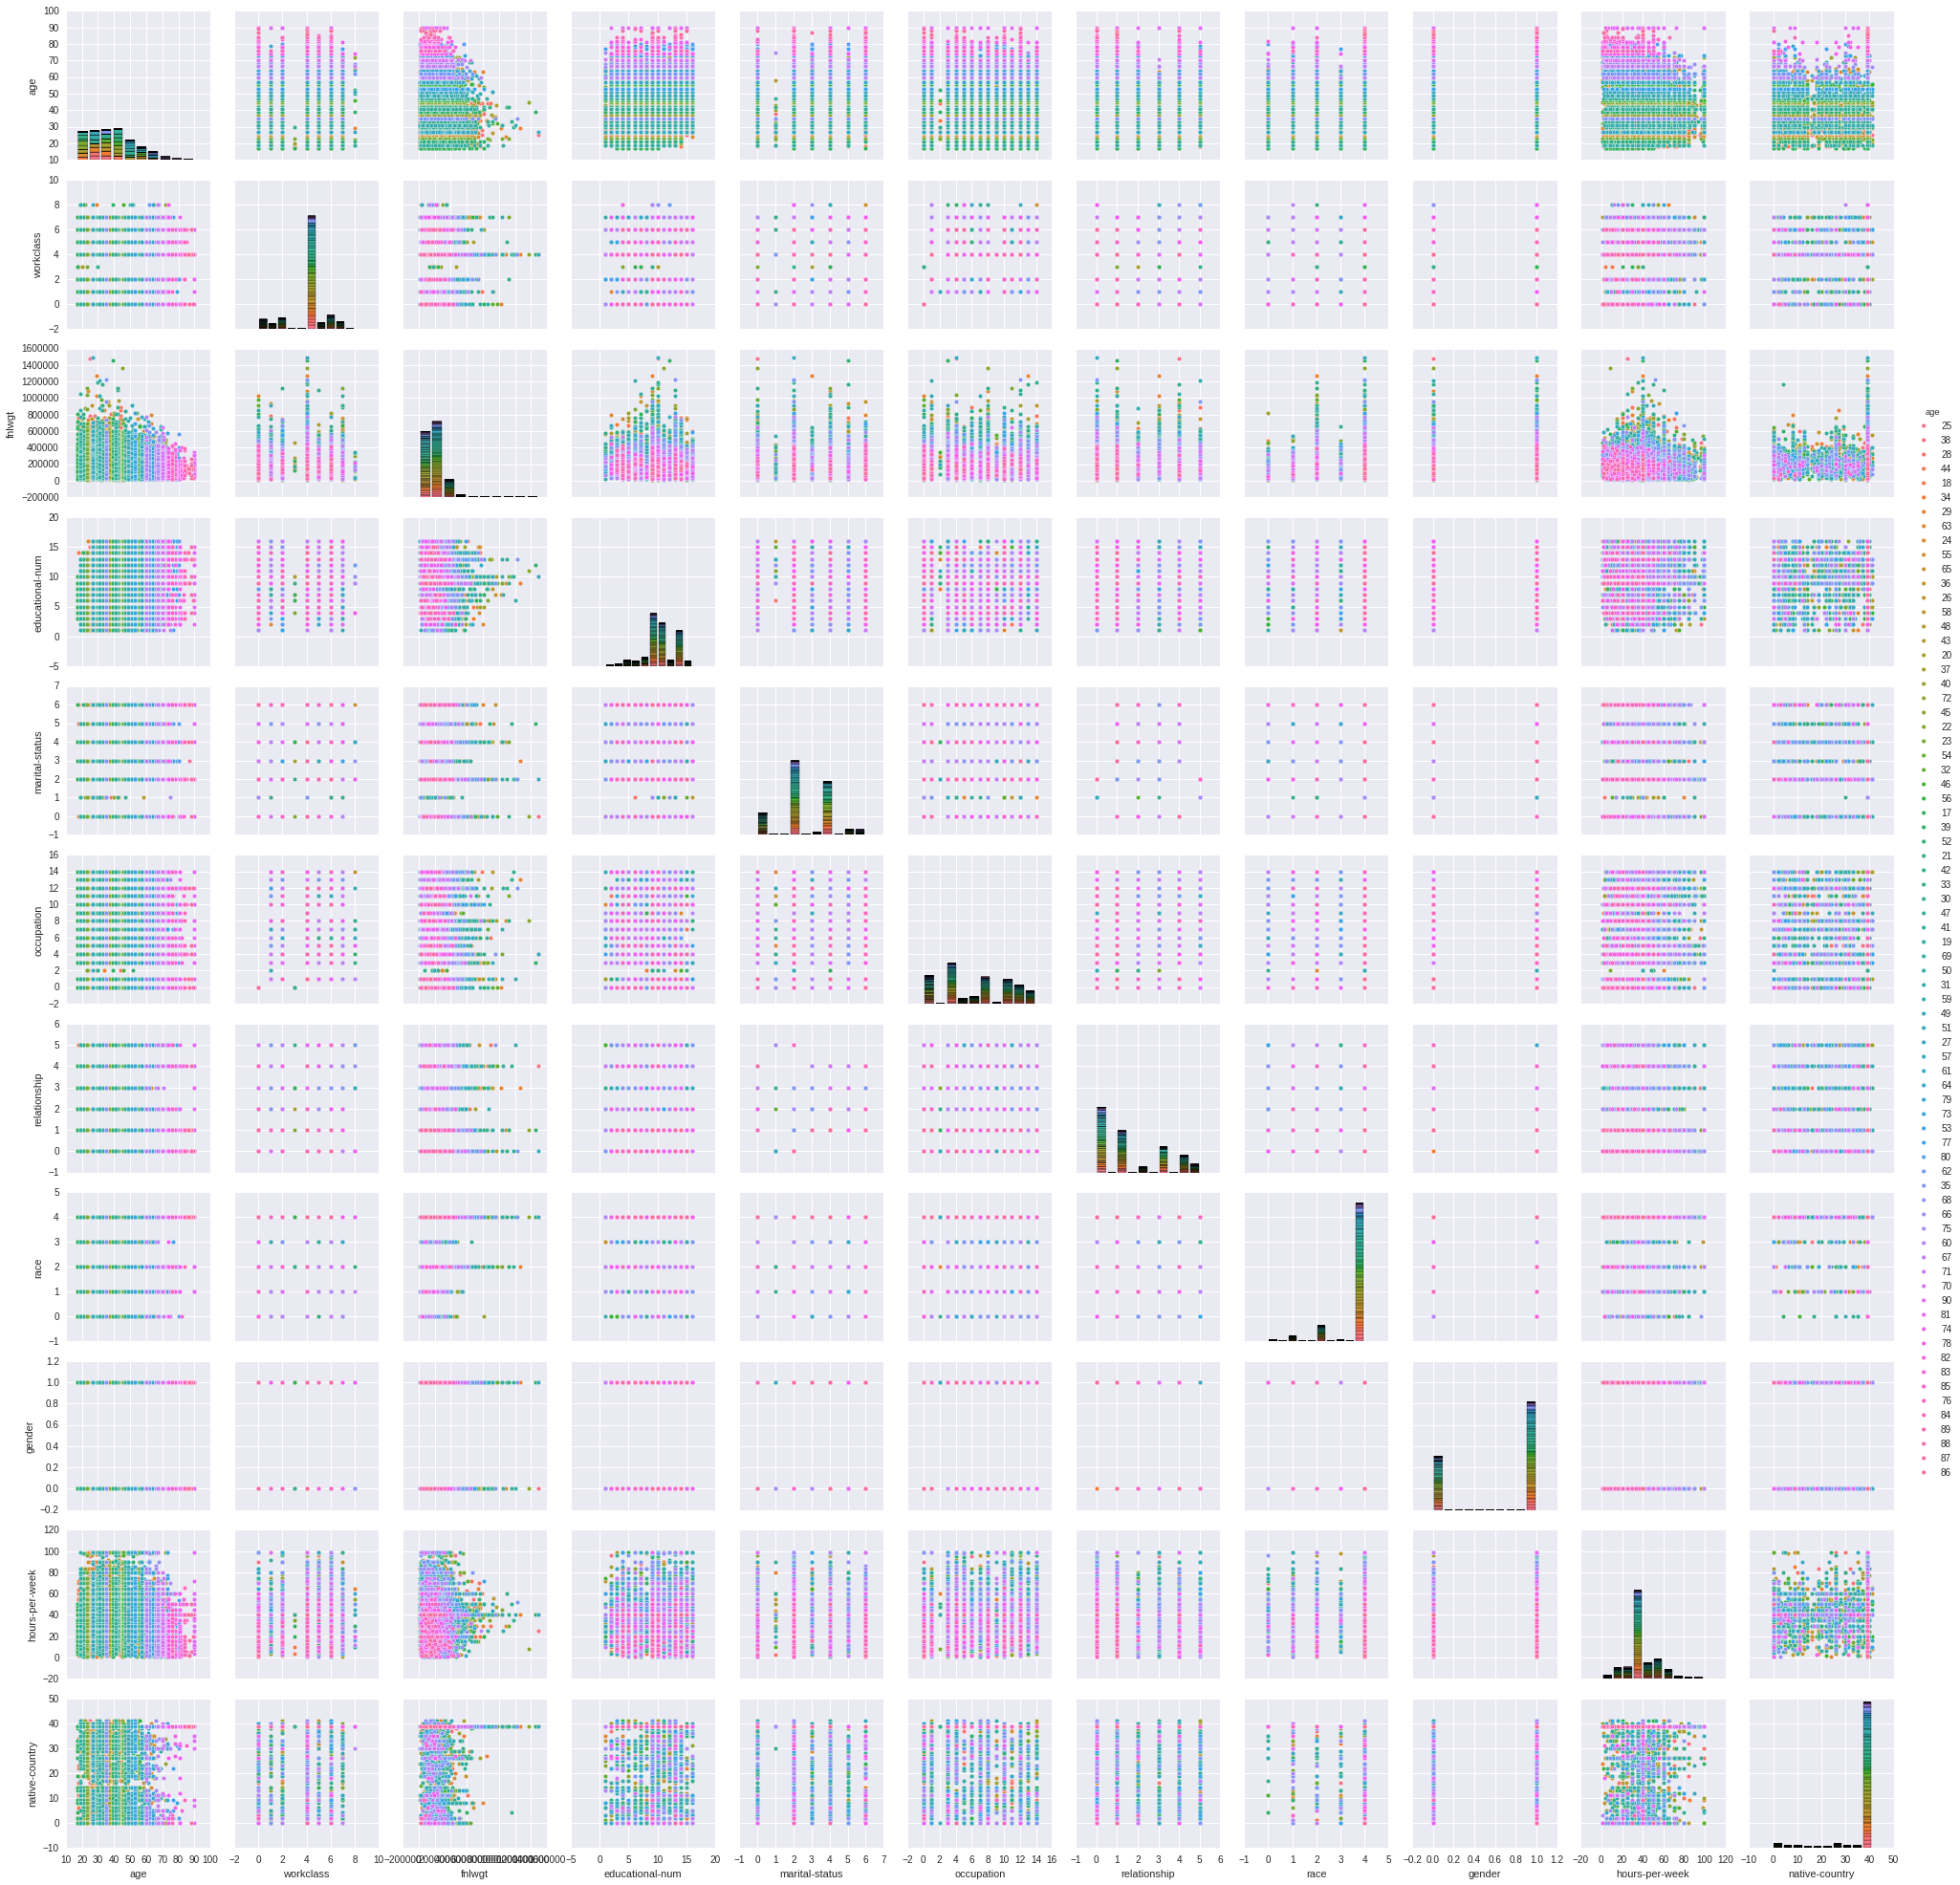

In [7]:
sb.pairplot(X,hue="age")
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X['workclass'])
X['workclass'] = le.transform(X['workclass'])
le.fit(X['marital-status']) 
X['marital-status'] = le.transform(X['marital-status'])
le.fit(X['occupation'])
X['occupation'] = le.transform(X['occupation'])
le.fit(X['relationship'])
X['relationship'] = le.transform(X['relationship'])
le.fit(X['race'])
X['race'] = le.transform(X['race'])
le.fit(X['gender'])
X['gender'] = le.transform(X['gender'])
le.fit(X['native-country'])
X['native-country'] = le.transform(X['native-country'])
le.fit(y)
y = le.transform(y)


#le.fit(X['marital-status'])
#le.transform(X['marital-status'])

/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [8]:
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,4,226802,7,4,7,3,2,1,40,39
1,38,4,89814,9,2,5,0,4,1,50,39
2,28,2,336951,12,2,11,0,4,1,40,39
3,44,4,160323,10,2,7,0,2,1,40,39
4,18,0,103497,10,4,0,3,4,0,30,39
5,34,4,198693,6,4,8,1,4,1,30,39
6,29,0,227026,9,4,0,4,2,1,40,39
7,63,6,104626,15,2,10,0,4,1,32,39
8,24,4,369667,10,4,8,4,4,0,40,39
9,55,4,104996,4,2,3,0,4,1,10,39


In [9]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [10]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

/home/raghav/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import Perceptron
ppn = Perceptron()
ppn.fit(X_train_std,y_train)
y_pred = ppn.predict(X_test_std)
print ('misclassified points = %d' %(y_test != y_pred).sum())
y_pred

misclassified points = 3800


/home/raghav/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1, 1, 1, ..., 0, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.740667440115


In [18]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(max_depth=3,random_state=42)
tr.fit(X_train_std,y_train)
y_pred = tr.predict(X_test_std)
print ('misclassified points = %d' %(y_pred != y_test).sum())
y_pred


misclassified points = 2596


array([0, 1, 0, ..., 0, 0, 0])

In [15]:
print ('accuracy on training set = %f' %tr.score(X_train_std,y_train))
print ('accuracy on test set = %f' %tr.score(X_test_std,y_test))

accuracy on training set = 0.823452
accuracy on test set = 0.822835


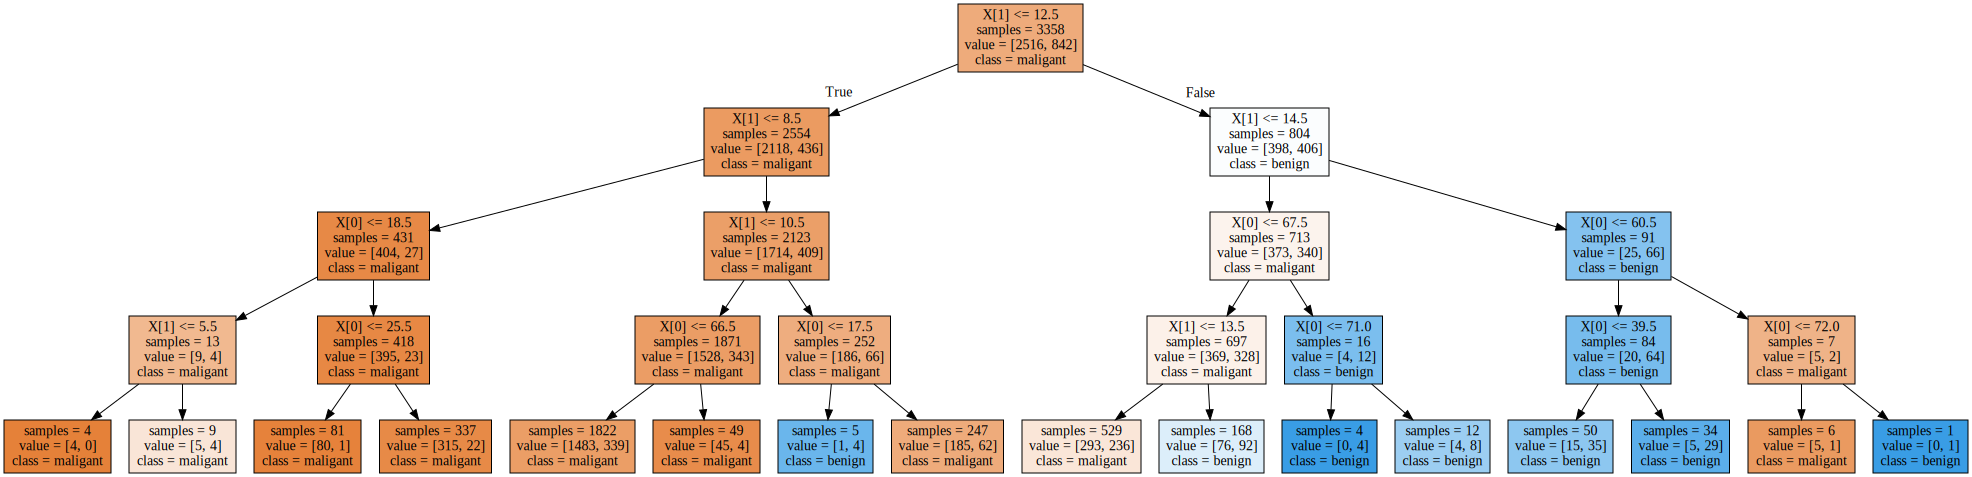

In [19]:
import graphviz

with open("/home/raghav/Desktop/introduction to machine learning/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
print('misclassified points = %d'%(y_pred != y_test).sum())

misclassified points = 2875


In [17]:
print ('accuracy on training set = %f' %lr.score(X_train_std,y_train))
print ('accuracy on test set = %f' %lr.score(X_test_std,y_test))

accuracy on training set = 0.806721
accuracy on test set = 0.803794


In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',C=1.0,random_state=0)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print ('misclassified points = %d' %(y_pred != y_test).sum())

misclassified points = 3506


In [21]:
from sklearn.metrics import accuracy_score
print ('accuracy score = %.2f' %accuracy_score(y_pred,y_test))

accuracy score = 0.76


In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print ('misclassified points = %d' %(y_pred != y_test).sum())


misclassified points = 3503


In [37]:
from sklearn.metrics import accuracy_score
print ('accuracy score = %.2f' %accuracy_score(y_pred,y_test))

accuracy score = 0.76


In [24]:
from sklearn.neural_network import MLPClassifier as M
import time
start_time = time.time()
mlp = M(hidden_layer_sizes=(192,512,128,15),random_state=42,tol=0.001,activation='relu',verbose=10,learning_rate='adaptive')
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.37989590
Iteration 2, loss = 0.35454915
Iteration 3, loss = 0.35070816
Iteration 4, loss = 0.34771875
Iteration 5, loss = 0.34569295
Iteration 6, loss = 0.34399009
Iteration 7, loss = 0.34208037
Iteration 8, loss = 0.33996057
Iteration 9, loss = 0.33864045
Iteration 10, loss = 0.33618099
Iteration 11, loss = 0.33437023
Iteration 12, loss = 0.33311004
Iteration 13, loss = 0.32940843
Iteration 14, loss = 0.32803114
Iteration 15, loss = 0.32597084
Iteration 16, loss = 0.32410719
Iteration 17, loss = 0.32134236
Iteration 18, loss = 0.31898932
Iteration 19, loss = 0.31688855
Iteration 20, loss = 0.31410236
Iteration 21, loss = 0.31032740
Iteration 22, loss = 0.30832412
Iteration 23, loss = 0.30619964
Iteration 24, loss = 0.30339508
Iteration 25, loss = 0.29988134
Iteration 26, loss = 0.29634040
Iteration 27, loss = 0.29258847
Iteration 28, loss = 0.29051119
Iteration 29, loss = 0.28593572
Iteration 30, loss = 0.28282544
Iteration 31, loss = 0.28004069
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(192, 512, 128, 15), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [25]:
mlp.score(X_train_std,y_train)

0.94425107490713389

In [26]:
mlp.score(X_test_std,y_test)

0.8017470825087013

In [27]:
from sklearn.neural_network import MLPClassifier as M
import time
start_time = time.time()
mlp = M(hidden_layer_sizes=(192,512,128,15),random_state=42,tol=0.001,activation='tanh',verbose=10,learning_rate='adaptive')
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.37986496
Iteration 2, loss = 0.35920796
Iteration 3, loss = 0.35621429
Iteration 4, loss = 0.35305291
Iteration 5, loss = 0.35160153
Iteration 6, loss = 0.34952640
Iteration 7, loss = 0.34817622
Iteration 8, loss = 0.34650616
Iteration 9, loss = 0.34565704
Iteration 10, loss = 0.34337011
Iteration 11, loss = 0.34256219
Iteration 12, loss = 0.34059933
Iteration 13, loss = 0.33834166
Iteration 14, loss = 0.33685902
Iteration 15, loss = 0.33608954
Iteration 16, loss = 0.33504428
Iteration 17, loss = 0.33266231
Iteration 18, loss = 0.33215201
Iteration 19, loss = 0.32908465
Iteration 20, loss = 0.32748471
Iteration 21, loss = 0.32675102
Iteration 22, loss = 0.32433556
Iteration 23, loss = 0.32237431
Iteration 24, loss = 0.32132479
Iteration 25, loss = 0.31848192
Iteration 26, loss = 0.31674671
Iteration 27, loss = 0.31308684
Iteration 28, loss = 0.31194913
Iteration 29, loss = 0.30834355
Iteration 30, loss = 0.30632897
Iteration 31, loss = 0.30340171
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(192, 512, 128, 15), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [28]:
mlp.score(X_train_std,y_train)

0.95077364064465175

In [29]:
mlp.score(X_test_std,y_test)

0.79676516754248272

In [31]:
from sklearn.neural_network import MLPClassifier as M
import time
start_time = time.time()
mlp = M(hidden_layer_sizes=(192,512,128,15),random_state=42,tol=0.001,activation='identity',verbose=10,learning_rate='adaptive')
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.43329077
Iteration 2, loss = 0.42247495
Iteration 3, loss = 0.42143979
Iteration 4, loss = 0.42075057
Iteration 5, loss = 0.42040124
Iteration 6, loss = 0.42021278
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(192, 512, 128, 15), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [32]:
mlp.score(X_train_std,y_train)

0.80768668285120948

In [33]:
mlp.score(X_test_std,y_test)

0.80618303419095061

In [34]:
from sklearn.neural_network import MLPClassifier as M
import time
start_time = time.time()
mlp = M(hidden_layer_sizes=(192,512,128,15,67),random_state=42,tol=0.001,activation='tanh',verbose=10,learning_rate='adaptive')
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.38667917
Iteration 2, loss = 0.36091909
Iteration 3, loss = 0.35676684
Iteration 4, loss = 0.35317058
Iteration 5, loss = 0.35144519
Iteration 6, loss = 0.35017626
Iteration 7, loss = 0.34823706
Iteration 8, loss = 0.34676273
Iteration 9, loss = 0.34561982
Iteration 10, loss = 0.34357856
Iteration 11, loss = 0.34109737
Iteration 12, loss = 0.34143055
Iteration 13, loss = 0.33849506
Iteration 14, loss = 0.33725088
Iteration 15, loss = 0.33608503
Iteration 16, loss = 0.33504642
Iteration 17, loss = 0.33213998
Iteration 18, loss = 0.32966682
Iteration 19, loss = 0.32817149
Iteration 20, loss = 0.32708942
Iteration 21, loss = 0.32538847
Iteration 22, loss = 0.32273001
Iteration 23, loss = 0.32066827
Iteration 24, loss = 0.31858214
Iteration 25, loss = 0.31532071
Iteration 26, loss = 0.31388387
Iteration 27, loss = 0.31175122
Iteration 28, loss = 0.30931219
Iteration 29, loss = 0.30617843
Iteration 30, loss = 0.30375233
Iteration 31, loss = 0.29928741
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(192, 512, 128, 15, 67),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=42,
       shuffle=True, solver='adam', tol=0.001, validation_fraction=0.1,
       verbose=10, warm_start=False)

In [35]:
mlp.score(X_train_std,y_train)

0.94825821170551927

In [36]:
mlp.score(X_test_std,y_test)

0.79615095884801745